# Chatbot
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/

## Quickstart

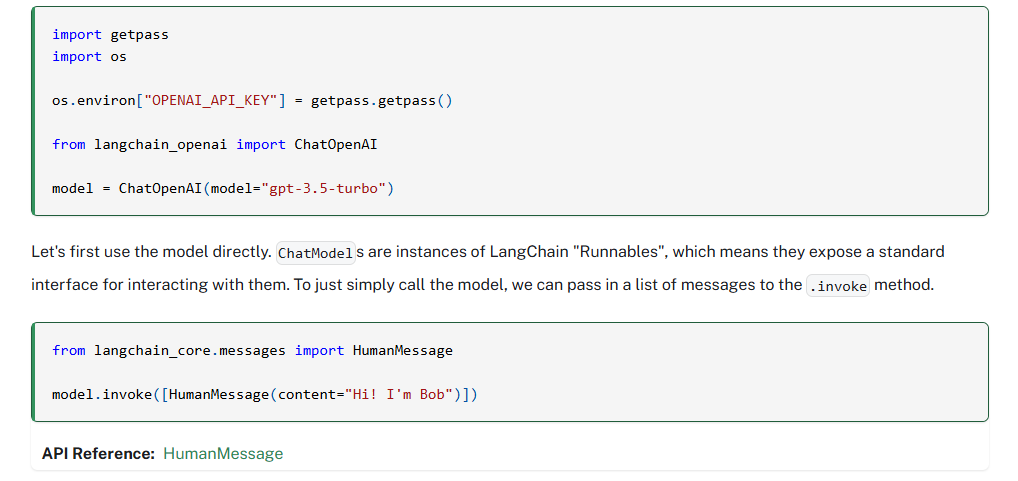

In [210]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv


In [211]:
load_dotenv()


True

In [212]:
model = ChatOpenAI(model='gpt-3.5-turbo')
model 


ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000019E84045930>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000019E840BD270>, root_client=<openai.OpenAI object at 0x0000019E840C3A30>, root_async_client=<openai.AsyncOpenAI object at 0x0000019E840449D0>, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [213]:
ai_message = model.invoke([HumanMessage(content="Hi! I'm Bob")])

In [214]:
ai_message.content

'Hello Bob! How can I assist you today?'

In [215]:
ai_message_02 = model.invoke('What is my name?')
ai_message_02

AIMessage(content="I'm sorry, I don't have access to your personal information and cannot determine your name.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 12, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6branYYArVI4l7MNDd9CIuKNv64', 'finish_reason': 'stop', 'logprobs': None}, id='run-6ceedf61-e27b-419e-96b8-0cb9b09fd81a-0', usage_metadata={'input_tokens': 12, 'output_tokens': 19, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [216]:
ai_message_03 = model.invoke([HumanMessage('What is my name?')])
ai_message_03

AIMessage(content="I'm sorry, I do not have access to personal information. Could you please provide me with your name?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 12, 'total_tokens': 34, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6bsSkT3e5XWRroy2mIvO0iCLw6I', 'finish_reason': 'stop', 'logprobs': None}, id='run-b2c58be2-286f-409d-b036-67e000b8a1b3-0', usage_metadata={'input_tokens': 12, 'output_tokens': 22, 'total_tokens': 34, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [217]:
from langchain_core.messages import AIMessage
ai_message_04 = model.invoke(
    [
    HumanMessage(content='Hi I am Bob'),
    AIMessage(content='hellow Bob! How can I assist you today?'),
    HumanMessage(content='What is my name?')
    ]
) 
ai_message_04.content

'Your name is Bob.'

## Message History

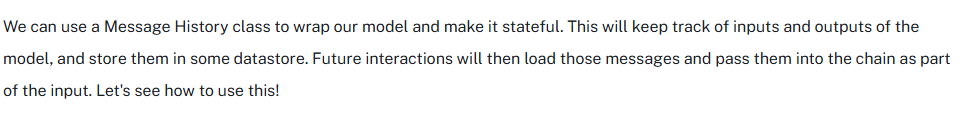

In [218]:
from langchain_core.chat_history import(
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id:str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]

with_message_history = RunnableWithMessageHistory(model,get_session_history)

In [219]:
config = {'configurable': {'session_id': 'abc'}}

response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
    config=config
)

response.content

'Hello Bob! Nice to meet you. How can I assist you today?'

In [220]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content


'Your name is Bob.'

### [문제] 대화 이력(message history)에서 첫 번째 질문(Human Message) 출력

In [221]:
## 대화 이력
get_session_history('abc')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 12, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6bumimSUP0viGf745lwk1XPrEsq', 'finish_reason': 'stop', 'logprobs': None}, id='run-2f039bd3-d61f-4568-8fd4-511b59731b16-0', usage_metadata={'input_tokens': 12, 'output_tokens': 15, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, resp

In [222]:
get_session_history('abc').messages

[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 12, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6bumimSUP0viGf745lwk1XPrEsq', 'finish_reason': 'stop', 'logprobs': None}, id='run-2f039bd3-d61f-4568-8fd4-511b59731b16-0', usage_metadata={'input_tokens': 12, 'output_tokens': 15, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(cont

In [223]:
type(get_session_history('abc').messages)

list

In [224]:
get_session_history('abc').messages[0]

HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={})

In [225]:
get_session_history('abc').messages[0].content

'Hi! I am Bob'

In [226]:
config = {'configurable': {'session_id': 'abc2'}}

response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content

"I'm sorry, as an AI assistant I don't have access to personal information unless you provide it to me. How can I assist you today?"

In [227]:
len(store)

2

In [228]:
store.keys()

dict_keys(['abc', 'abc2'])

In [229]:
get_session_history('abc2')

InMemoryChatMessageHistory(messages=[HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm sorry, as an AI assistant I don't have access to personal information unless you provide it to me. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 12, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6bv4jCiFkSJzCC4A9Kh6SIboifn', 'finish_reason': 'stop', 'logprobs': None}, id='run-26935566-f1c5-49fd-bf42-4bd9ab3a987a-0', usage_metadata={'input_tokens': 12, 'output_tokens': 30, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoni

In [230]:
for message in get_session_history('abc2').messages:
    print(message.content)

What is my name?
I'm sorry, as an AI assistant I don't have access to personal information unless you provide it to me. How can I assist you today?


In [231]:
config = {'configurable': {'session_id': 'abc'}}

response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content

'Your name is Bob.'

In [232]:
for message in get_session_history('abc').messages:
    print(message.content)

Hi! I am Bob
Hello Bob! Nice to meet you. How can I assist you today?
What is my name?
Your name is Bob.
What is my name?
Your name is Bob.


## Prompt templates

In [233]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        ('system','You are a helpful assistant. Answer all questions to the best of your ability.'),
         MessagesPlaceholder(variable_name='messages'),
    ]
)

chain = prompt | model

In [234]:
response = chain.invoke({"messages": [HumanMessage(content="hi! I'm Bob")]})

response.content

'Hello Bob! How can I assist you today?'

In [235]:
len(store)

2

In [236]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

config = {'configurable': {'session_id':'abc3'}}

response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Jim')],
    config=config
)

response.content

'Hello, Jim! How can I assist you today?'

In [237]:
len(store)

3

In [238]:
store.keys()

dict_keys(['abc', 'abc2', 'abc3'])

In [239]:
get_session_history('abc3').messages

[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, Jim! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 32, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6byz68oFjlZLawTjWPHsqTzq98l', 'finish_reason': 'stop', 'logprobs': None}, id='run-f5f39329-f310-4d06-b45b-4529315cb713-0', usage_metadata={'input_tokens': 32, 'output_tokens': 11, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [240]:
for message in get_session_history('abc3').messages:
    print(message.content)

Hi! I am Jim
Hello, Jim! How can I assist you today?


In [241]:
store['abc3']

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, Jim! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 32, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6byz68oFjlZLawTjWPHsqTzq98l', 'finish_reason': 'stop', 'logprobs': None}, id='run-f5f39329-f310-4d06-b45b-4529315cb713-0', usage_metadata={'input_tokens': 32, 'output_tokens': 11, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [242]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content

'Your name is Jim.'

In [243]:
get_session_history('abc3')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, Jim! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 32, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6byz68oFjlZLawTjWPHsqTzq98l', 'finish_reason': 'stop', 'logprobs': None}, id='run-f5f39329-f310-4d06-b45b-4529315cb713-0', usage_metadata={'input_tokens': 32, 'output_tokens': 11, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={})

In [244]:
for message in get_session_history('abc3').messages:
    print(f'[{message.type.upper()}]:{message.content}')

[HUMAN]:Hi! I am Jim
[AI]:Hello, Jim! How can I assist you today?
[HUMAN]:What is my name?
[AI]:Your name is Jim.


In [245]:
get_session_history('abc3').messages

[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, Jim! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 32, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6byz68oFjlZLawTjWPHsqTzq98l', 'finish_reason': 'stop', 'logprobs': None}, id='run-f5f39329-f310-4d06-b45b-4529315cb713-0', usage_metadata={'input_tokens': 32, 'output_tokens': 11, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Your name is

In [246]:
get_session_history('abc3').messages[0]

HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={})

In [247]:
get_session_history('abc3').messages[0].type

'human'

In [248]:
get_session_history('abc3').messages[0].type.upper()

'HUMAN'

In [249]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system', 'You are helpful assistant. Answer all question to the best of your ability in {language}.',),
        MessagesPlaceholder(variable_name='messages') 
    ])

chain = prompt | model

- Let's now wrap this more complicated chain in a Message History class. 
- This time, because there are multiple keys in the input, we need to specify the correct key to use to save the chat history.

In [250]:
response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm bob")], "language": "Spanish"}
)

response.content

'¡Hola, Bob! ¿En qué puedo ayudarte hoy?'

In [251]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key='messages',
)

config = {'configurable': {'session_id': 'abc4'}}

response = with_message_history.invoke(
    {'messages': [HumanMessage(content='Hi! I am Todd')], 'language': 'Spanish'},
    config=config,
)

response.content

'¡Hola Todd! ¿En qué puedo ayudarte hoy?'

In [252]:
len(store)

4

In [253]:
get_session_history('abc4')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Todd', additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola Todd! ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 33, 'total_tokens': 45, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6c1hM4TmZvXQtnPh8qRmTUtIkFc', 'finish_reason': 'stop', 'logprobs': None}, id='run-c1bfe9cf-c1d1-4983-9948-f22384d67b41-0', usage_metadata={'input_tokens': 33, 'output_tokens': 12, 'total_tokens': 45, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [254]:
response = with_message_history.invoke(
    {'messages': [HumanMessage(content='Whats my name?')], 'language': 'Spanish'},
    config=config,
)

response.content

'Tu nombre es Todd.'

In [255]:
get_session_history('abc4').messages

[HumanMessage(content='Hi! I am Todd', additional_kwargs={}, response_metadata={}),
 AIMessage(content='¡Hola Todd! ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 33, 'total_tokens': 45, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bc6c1hM4TmZvXQtnPh8qRmTUtIkFc', 'finish_reason': 'stop', 'logprobs': None}, id='run-c1bfe9cf-c1d1-4983-9948-f22384d67b41-0', usage_metadata={'input_tokens': 33, 'output_tokens': 12, 'total_tokens': 45, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='Whats my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Tu nombre es 

## Managing Conversation History

In [256]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content='You are a godd assistant'),
    HumanMessage(content='Hi! I am Bob'),
    AIMessage(content='Hi!'),
    HumanMessage(content='I like vanilla ice cream'),
    AIMessage(content='nice'),
    HumanMessage(content='Whats 2 + 2'),
    AIMessage(content='4'),
    HumanMessage(content='Thanks'),
    AIMessage(content='No problem!'),
    HumanMessage(content='Having fun?'),
    AIMessage(content='Yes!'),
]

trimmer.invoke(messages)

[SystemMessage(content='You are a godd assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='No problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yes!', additional_kwargs={}, response_metadata={})]